1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


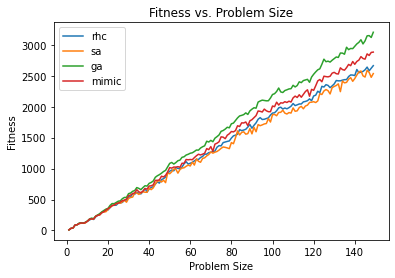

In [1]:
import pandas as pd 
import mlrose_hiive as rose
import numpy as np 
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner, RHCRunner,MIMICRunner
##from mlrose_hiive.runners._runner_base import _RunnerBase
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,train_test_split,validation_curve,learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import category_encoders
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
from sklearn.model_selection import cross_val_score
#from keras.models import Sequential
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import numpy as np 
import time 
import warnings
warnings.filterwarnings("ignore")


def run_RHC(problem):
    rhc= RHCRunner(problem=problem,experiment_name='four_peak_rhc',output_directory=None,
                    seed=123,
                    iteration_list=2 ** np.arange(9),
                    max_attempts=500,
                    restart_list=[25]) 


    rhc_df_run_stats, rhc_df_run_curves = rhc.run()
    return rhc_df_run_stats,rhc_df_run_curves


def run_SA(problem):

    sa = SARunner(problem=problem,
              experiment_name='four_peak_sa',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=123,
              iteration_list=2 ** np.arange(11),
              max_attempts=500,
              temperature_list=[5.0],
              decay_list=[rose.GeomDecay])

    sa_df_run_stats, sa_df_run_curves = sa.run()
    return sa_df_run_stats,sa_df_run_curves



def run_GA(problem):
    ga = GARunner(problem=problem,
              experiment_name='four_peak_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=123,
              iteration_list=2 ** np.arange(11),
              population_sizes=[ 50],
              mutation_rates=[0.5])

    ga_df_run_stats, ga_df_run_curves = ga.run()
    return ga_df_run_stats,ga_df_run_curves


def run_mimic(problem):
    mmc= MIMICRunner(problem=problem,
                        experiment_name='four_peak_mmc',
                        output_directory=None,
                        seed=123,
                        iteration_list=2 ** np.arange(11),
                        max_attempts=500,population_sizes=[100],
                        keep_percent_list=[0.5])
    mmc_df_run_stats, mmc_df_run_curves = mmc.run()
    return mmc_df_run_stats, mmc_df_run_curves



sizerange=[]
rhcsizevfitness=[]
sasizevfitness=[]
gasizevfitness=[]
mimicsizevfitness=[]

for i in range(1,150): 
    print(i)
    sizerange.append(i)
    problem = rose.KnapsackGenerator().generate(seed=123,number_of_items_types=i)


    fourpeak_rhc_df_run_stats,fourpeak_rhc_df_run_curves =run_RHC(problem)
    rhcsizevfitness.append(fourpeak_rhc_df_run_curves.Fitness.max())  

    fourpeak_sa_df_run_stats,fourpeak_sa_df_run_curves =run_SA(problem)
    sasizevfitness.append(fourpeak_sa_df_run_stats.Fitness.max())  

    fourpeak_ga_df_run_stats,fourpeak_ga_df_run_curves =run_GA(problem)
    gasizevfitness.append(fourpeak_ga_df_run_curves.Fitness.max())  

    fourpeak_mmc_df_run_stats,fourpeak_mmc_df_run_curves =run_mimic(problem)
    mimicsizevfitness.append(fourpeak_mmc_df_run_curves.Fitness.max())  

plt.plot(sizerange,rhcsizevfitness,label='rhc')
plt.plot(sizerange,sasizevfitness,label='sa')
plt.plot(sizerange,gasizevfitness,label='ga')
plt.plot(sizerange,mimicsizevfitness,label='mimic')
plt.title("Fitness vs. Problem Size")
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.legend()


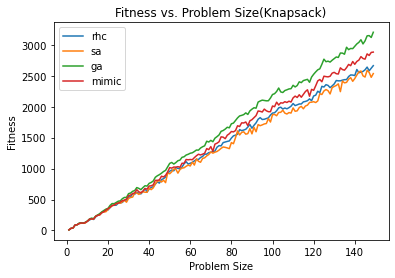

In [2]:
plt.plot(sizerange,rhcsizevfitness,label='rhc')
plt.plot(sizerange,sasizevfitness,label='sa')
plt.plot(sizerange,gasizevfitness,label='ga')
plt.plot(sizerange,mimicsizevfitness,label='mimic')
plt.title("Fitness vs. Problem Size(Knapsack)")
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.legend()